In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dataprep.eda import create_report

In [13]:
def fraud(dataframe):
    return dataframe[dataframe["FraudResult"]== 1]

def no_fraud(dataframe):
    return dataframe[dataframe["FraudResult"]== 0]

**Column Name**, Definition  
**TransactionId**, Unique transaction identifier on platform  
**BatchId**, Unique number assigned to a batch of transactions for processing  
**AccountId**,  Unique number identifying the customer on platform  
**SubscriptionId**,  Unique number identifying the customer subscription  
**CustomerId**,  Unique identifier attached to Account  
**CurrencyCode**,  Country currency  
**CountryCode**,  Numerical geographical code of country  
**ProviderId**,  Source provider of Item bought.  
**ProductId**,  Item name being bought.  
**ProductCategory**,  ProductIds are organized into these broader product categories.  
**ChannelId**,  "Identifies if customer used web,Android, IOS, pay later or checkout."  
**Amount**,  Value of the transaction. Positive for debits from customer account and negative for credit into customer account  
**Value**,  Absolute value of the amount  
**TransactionStartTime**,  Transaction start time  
**PricingStrategy**,  Category of Xente's pricing structure for merchants  
**FraudResult**,  Fraud status of transaction 1 -yes or 0-No

In [14]:
df = pd.read_csv("data/training.csv")
df.head(10)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0
5,TransactionId_23223,BatchId_25954,AccountId_1078,SubscriptionId_4238,CustomerId_1432,UGX,256,ProviderId_6,ProductId_3,airtime,ChannelId_3,2000.0,2000,2018-11-15T03:35:10Z,2,0
6,TransactionId_118063,BatchId_118460,AccountId_2442,SubscriptionId_1980,CustomerId_2858,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,10000.0,10000,2018-11-15T03:44:31Z,4,0
7,TransactionId_100640,BatchId_38561,AccountId_4841,SubscriptionId_3829,CustomerId_2858,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-500.0,500,2018-11-15T03:45:13Z,2,0
8,TransactionId_51905,BatchId_93774,AccountId_272,SubscriptionId_4731,CustomerId_598,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,500.0,500,2018-11-15T04:14:59Z,2,0
9,TransactionId_130161,BatchId_82409,AccountId_710,SubscriptionId_920,CustomerId_1053,UGX,256,ProviderId_1,ProductId_15,financial_services,ChannelId_3,600.0,600,2018-11-15T04:31:48Z,2,0


In [15]:
df[abs(df["Amount"]) != df["Value"]].sample(10)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
68771,TransactionId_90945,BatchId_101054,AccountId_828,SubscriptionId_3148,CustomerId_1172,UGX,256,ProviderId_6,ProductId_21,utility_bill,ChannelId_3,5000.0,5750,2019-01-23T07:04:59Z,2,0
2375,TransactionId_88088,BatchId_60302,AccountId_2604,SubscriptionId_1406,CustomerId_3022,UGX,256,ProviderId_6,ProductId_24,movies,ChannelId_3,5000.0,7000,2018-11-17T09:13:13Z,2,0
83165,TransactionId_62679,BatchId_71375,AccountId_3440,SubscriptionId_3720,CustomerId_3875,UGX,256,ProviderId_6,ProductId_13,utility_bill,ChannelId_1,23000.0,25690,2019-02-02T10:25:32Z,2,0
39302,TransactionId_68865,BatchId_110954,AccountId_4841,SubscriptionId_3829,CustomerId_2642,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-87.5,88,2018-12-24T17:29:57Z,2,0
86842,TransactionId_82883,BatchId_117539,AccountId_4841,SubscriptionId_3829,CustomerId_2574,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-12.5,13,2019-02-06T09:13:33Z,2,0
73403,TransactionId_15607,BatchId_24735,AccountId_1765,SubscriptionId_2004,CustomerId_2154,UGX,256,ProviderId_5,ProductId_13,utility_bill,ChannelId_3,10000.0,11200,2019-01-25T20:15:31Z,2,0
78893,TransactionId_8336,BatchId_86501,AccountId_456,SubscriptionId_3504,CustomerId_786,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,3000.0,3690,2019-01-31T07:46:19Z,2,0
63310,TransactionId_136409,BatchId_22574,AccountId_4841,SubscriptionId_3829,CustomerId_3712,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-5.2,6,2019-01-18T09:46:34Z,2,0
19132,TransactionId_87741,BatchId_46099,AccountId_697,SubscriptionId_1983,CustomerId_1039,UGX,256,ProviderId_6,ProductId_21,utility_bill,ChannelId_3,19000.0,20770,2018-12-07T08:56:41Z,2,0
80070,TransactionId_115563,BatchId_55425,AccountId_3235,SubscriptionId_2089,CustomerId_3663,UGX,256,ProviderId_5,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2019-02-01T05:37:55Z,2,0


In [16]:
df[abs(df["Amount"]) != df["Value"]].PricingStrategy.unique()

array([2, 1])

In [17]:
df["fee"]= df["Value"] / abs(df["Amount"])
df[abs(df["Amount"]) != df["Value"]]

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,fee
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.00,21800,2018-11-15T03:32:55Z,2,0,1.090000
34,TransactionId_10285,BatchId_113188,AccountId_4841,SubscriptionId_3829,CustomerId_2531,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-67.25,68,2018-11-15T05:50:48Z,2,0,1.011152
41,TransactionId_34855,BatchId_45933,AccountId_826,SubscriptionId_1611,CustomerId_1170,UGX,256,ProviderId_5,ProductId_21,utility_bill,ChannelId_3,10000.00,11200,2018-11-15T06:03:00Z,2,0,1.120000
48,TransactionId_86046,BatchId_112945,AccountId_714,SubscriptionId_2767,CustomerId_1057,UGX,256,ProviderId_5,ProductId_21,utility_bill,ChannelId_3,5000.00,5750,2018-11-15T06:08:57Z,2,0,1.150000
67,TransactionId_26794,BatchId_27897,AccountId_2132,SubscriptionId_4234,CustomerId_2537,UGX,256,ProviderId_6,ProductId_21,utility_bill,ChannelId_3,5000.00,5750,2018-11-15T06:39:10Z,2,0,1.150000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95210,TransactionId_122180,BatchId_39484,AccountId_4841,SubscriptionId_3829,CustomerId_2186,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-6.45,7,2019-02-12T19:32:26Z,2,0,1.085271
95285,TransactionId_133460,BatchId_41816,AccountId_4841,SubscriptionId_3829,CustomerId_4945,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-37.25,38,2019-02-12T22:28:25Z,2,0,1.020134
95331,TransactionId_75871,BatchId_12929,AccountId_4841,SubscriptionId_3829,CustomerId_3635,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-100.02,101,2019-02-13T04:53:45Z,2,0,1.009798
95333,TransactionId_42127,BatchId_52302,AccountId_4841,SubscriptionId_3829,CustomerId_3635,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-100.02,101,2019-02-13T04:55:36Z,2,0,1.009798


<AxesSubplot:xlabel='fee', ylabel='PricingStrategy'>

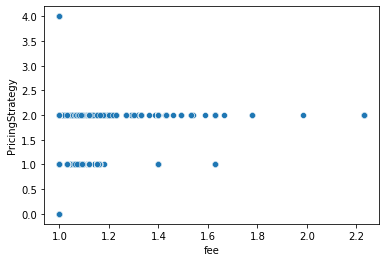

In [18]:
sns.scatterplot(data= df, x= "fee", y= "PricingStrategy")

Baseline model ideas: 
- Fraud if many negative transactions from the same account (or same customer)
- Very high numbers = Fraud
- High negative transactions made from phone
- Transactions at night?



Feature engineering ideas:
- Batch-Size (number of transactions with the same BatchID)
- Accounts per customer
- Work-hours or not
- In or Out

Processing:
- Binning of Amount









In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [20]:
df.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult,fee
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018,1.003839
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872,0.032331
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000,1.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000,1.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000,1.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000,1.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000,2.230000


<AxesSubplot:xlabel='Amount', ylabel='Count'>

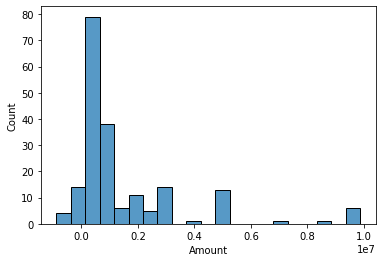

In [21]:
sns.histplot(df[df["FraudResult"]==1], x="Amount")

In [22]:
#sns.pairplot(df.select_dtypes(["int64", "float"]))

In [23]:
df.groupby("ProductCategory").mean()

,CountryCode,Amount,Value,PricingStrategy,FraudResult,fee
ProductCategory,,,,,,
airtime,256.0,822.956426,6049.799609,2.542785,0.000400,1.000000
data_bundles,256.0,3402.169870,3714.011159,2.435214,0.000000,1.000000
financial_services,256.0,11435.559465,12734.467570,1.988636,0.003546,1.000235
movies,256.0,7734.285714,10988.000000,1.948571,0.000000,1.395429
other,256.0,500.000000,500.000000,1.000000,0.000000,1.000000
ticket,256.0,96696.759259,96696.759259,2.652778,0.000000,1.000000
transport,256.0,170240.000000,170240.000000,1.760000,0.080000,1.000000
tv,256.0,16641.125880,18156.438624,1.939015,0.000000,1.003471
utility_bill,256.0,17232.858854,20946.692188,1.903646,0.006250,1.147396


In [24]:
#create_report(df)

In [25]:
#sns.pairplot(df.data, hue="FraudResult")

/Users/valentin/neuefische/Machine-Learning-Project_Xente-Fraud-Detection/.venv/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


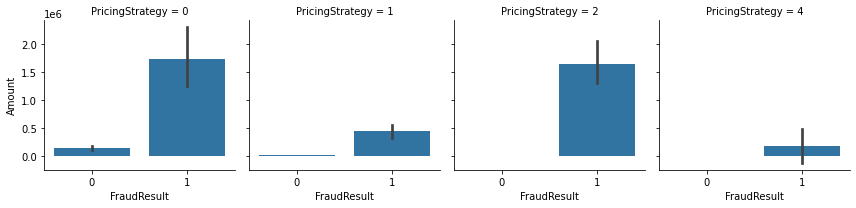

In [26]:
a= sns.FacetGrid(data=df, col="PricingStrategy", col_wrap=4)
a.map(sns.barplot, "FraudResult", "Amount")

/Users/valentin/neuefische/Machine-Learning-Project_Xente-Fraud-Detection/.venv/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


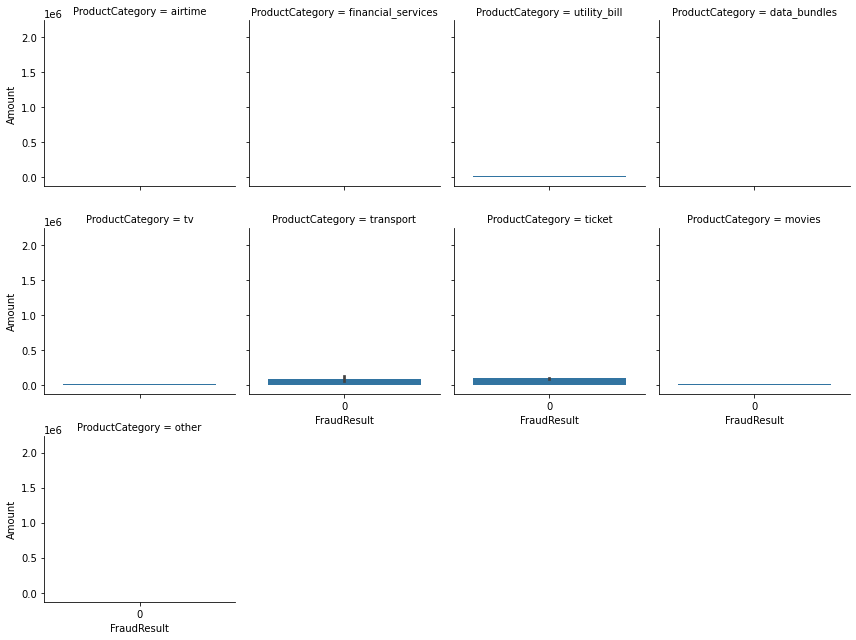

In [27]:
a= sns.FacetGrid(data=df, col="ProductCategory", col_wrap=4)
a.map(sns.barplot, "FraudResult", "Amount")

/Users/valentin/neuefische/Machine-Learning-Project_Xente-Fraud-Detection/.venv/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


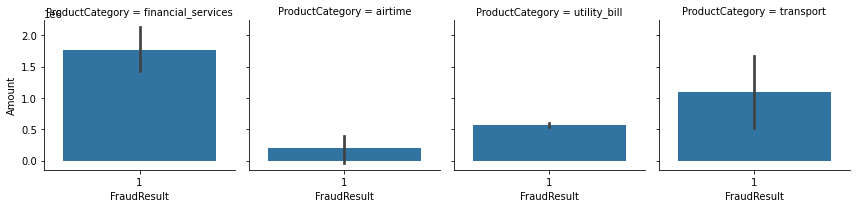

In [28]:
a= sns.FacetGrid(data=fraud(df), col="ProductCategory", col_wrap=4)
a.map(sns.barplot, "FraudResult", "Amount")


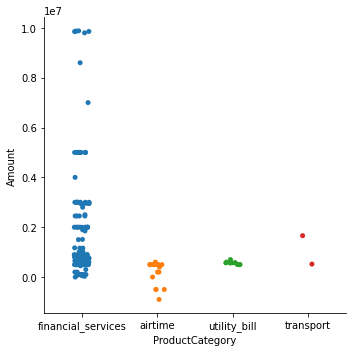

In [29]:
sns.catplot(data= fraud(df), x="ProductCategory", y="Amount")

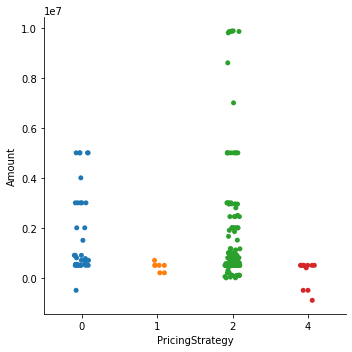

In [47]:
sns.catplot(data= fraud(df), x="PricingStrategy", y="Amount")

In [31]:
fraud(df).groupby("ProductCategory").count().iloc[:,0]

ProductCategory
airtime                18
financial_services    161
transport               2
utility_bill           12
Name: TransactionId, dtype: int64

In [32]:
fraud(df).groupby("ProductCategory").mean()["Value"]

ProductCategory
airtime               4.611389e+05
financial_services    1.763413e+06
transport             1.090000e+06
utility_bill          5.867602e+05
Name: Value, dtype: float64

In [33]:
no_fraud(df).groupby("ProductCategory").mean()["Value"]

ProductCategory
airtime                5867.800373
data_bundles           3714.011159
financial_services     6504.706724
movies                10988.000000
other                   500.000000
ticket                96696.759259
transport             90260.869565
tv                    18156.438624
utility_bill          17388.116876
Name: Value, dtype: float64

<AxesSubplot:xlabel='ProductCategory', ylabel='Value'>

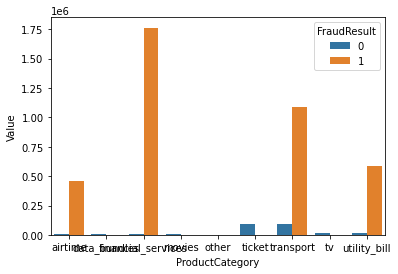

In [34]:
sns.barplot(data= df.groupby(["ProductCategory", "FraudResult"]).mean().reset_index(), x="ProductCategory", y="Value", hue="FraudResult")

In [35]:
df.groupby(["ProductCategory", "FraudResult"]).mean().reset_index()

,ProductCategory,FraudResult,CountryCode,Amount,Value,PricingStrategy,fee
0,airtime,0,256.0,7.455122e+02,5.867800e+03,2.542647,1.000000
1,airtime,1,256.0,1.944722e+05,4.611389e+05,2.888889,1.000000
2,data_bundles,0,256.0,3.402170e+03,3.714011e+03,2.435214,1.000000
3,financial_services,0,256.0,5.201221e+03,6.504707e+03,1.990098,1.000235
4,financial_services,1,256.0,1.763401e+06,1.763413e+06,1.577640,1.000000
5,movies,0,256.0,7.734286e+03,1.098800e+04,1.948571,1.395429
6,other,0,256.0,5.000000e+02,5.000000e+02,1.000000,1.000000
7,ticket,0,256.0,9.669676e+04,9.669676e+04,2.652778,1.000000
8,transport,0,256.0,9.026087e+04,9.026087e+04,1.739130,1.000000
9,transport,1,256.0,1.090000e+06,1.090000e+06,2.000000,1.000000


In [36]:
df["mean_value_prod_cat"] = df.groupby("ProductCategory")["Value"].transform("mean")

In [37]:
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,fee,mean_value_prod_cat
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0,1.00,6049.799609
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0,1.00,12734.467570
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0,1.00,6049.799609
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0,1.09,20946.692188
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0,1.00,12734.467570


In [38]:
df["rel_value_prod_cat"] = df["Value"] / df["mean_value_prod_cat"]

In [39]:
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,fee,mean_value_prod_cat,rel_value_prod_cat
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0,1.00,6049.799609,0.165295
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0,1.00,12734.467570,0.001571
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0,1.00,6049.799609,0.082647
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0,1.09,20946.692188,1.040737
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0,1.00,12734.467570,0.050571


<AxesSubplot:xlabel='rel_value_prod_cat', ylabel='Count'>

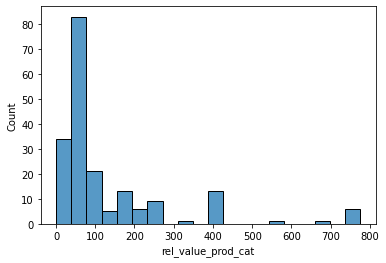

In [40]:
sns.histplot(fraud(df), x="rel_value_prod_cat", bins=20)

<AxesSubplot:xlabel='rel_value_prod_cat', ylabel='Count'>

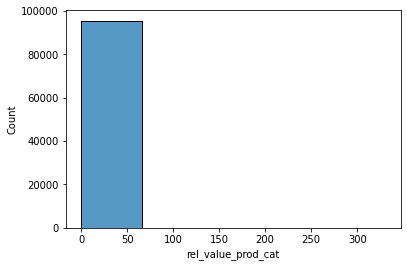

In [41]:
sns.histplot(no_fraud(df), x="rel_value_prod_cat", bins=5)

<AxesSubplot:xlabel='Value', ylabel='Count'>

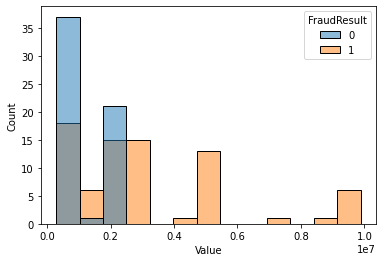

In [42]:
sns.histplot(df[df["rel_value_prod_cat"]> 75], x="Value", hue="FraudResult")

<AxesSubplot:xlabel='cutoff', ylabel='fraudpercentage'>

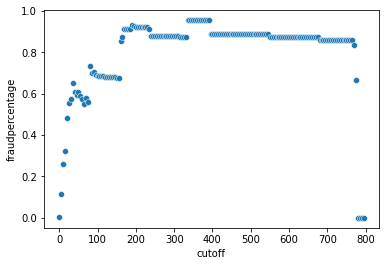

In [43]:
out= []
for i in range(0,800,5):
    fraudp= fraud(df[df["rel_value_prod_cat"]> i]).shape[0]
    no_fraudp= no_fraud(df[df["rel_value_prod_cat"]> i]).shape[0]
    out.append([i, fraudp / (fraudp+no_fraudp+1)])
fraudper = pd.DataFrame(out, columns=["cutoff", "fraudpercentage"])
sns.scatterplot(data=fraudper, x="cutoff", y="fraudpercentage")

In [44]:
fraud(df[df["rel_value_prod_cat"]> i]).shape[1]

19

In [45]:
pd.DataFrame(out, columns=["cutoff", "fraudpercentage"])

,cutoff,fraudpercentage
0,0,0.002017
1,5,0.115861
2,10,0.262222
3,15,0.322404
4,20,0.480769
...,...,...
155,775,0.666667
156,780,0.000000
157,785,0.000000
158,790,0.000000
